In [1]:
#import
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from network_control.metrics import node_strength, ave_control, modal_control
from network_control.utils import rank_int, matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
workdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/'
df = pd.read_csv(os.path.join(workdir, 'df.csv'))
df.set_index(keys='subjid', inplace=True)
# df = df.iloc[:100, :]

A = np.load(os.path.join(workdir, 'A.npy'))
# A = A[:, :, :100]

In [3]:
print(A.shape)

(400, 400, 775)


In [4]:
print(df['ageAtScan1'].head())

subjid
81287_2738    240
81754_2740    232
81903_2749    231
81043_2750    249
81939_2751    234
Name: ageAtScan1, dtype: int64


In [5]:
n_nodes = A.shape[0]
n_subs = A.shape[2]

In [6]:
# compute strength and average controllability
ac = np.zeros((n_subs, n_nodes))
mc = np.zeros((n_subs, n_nodes))

for i in np.arange(n_subs):
    ac[i, :] = ave_control(matrix_normalization(A[:, :, i]))
    mc[i, :] = modal_control(matrix_normalization(A[:, :, i]))

In [7]:
# mean over nodes
ac_node_mean = np.mean(ac, axis=1)
mc_node_mean = np.mean(mc, axis=1)

## Plot

/Users/lindenmp/opt/anaconda3/envs/control_package/lib/python3.6/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/lindenmp/opt/anaconda3/envs/control_package/lib/python3.6/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


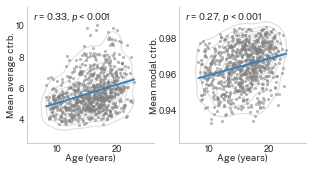

In [10]:
f, ax = plt.subplots(1, 2, figsize=(5, 2.5))
reg_plot(x=df['ageAtScan1']/12, y=ac_node_mean, xlabel='Age (years)', ylabel='Mean average ctrb.', ax=ax[0])
reg_plot(x=df['ageAtScan1']/12, y=mc_node_mean, xlabel='Age (years)', ylabel='Mean modal ctrb.', ax=ax[1])
plt.show()
f.savefig(os.path.join(workdir, 'docs', 'pages', 'examples', 'age_effects_metrics_corr(age,ac_node_mean)'), dpi=300, bbox_inches='tight', pad_inches=0.1)